# Section 1: Importation des bibliothèques nécessaires


In [ ]:
# On commence par importer les bibliothèques nécessaires à notre projet
import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


# Section 2: Chargement et exploration des données

In [2]:
# Download latest version
path = kagglehub.dataset_download("psparks/instacart-market-basket-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\tanto\.cache\kagglehub\datasets\psparks\instacart-market-basket-analysis\versions\1


In [ ]:
# Chargement des jeux de données 
aisles_df = pd.read_csv(path+"/aisles.csv")
aisles_df

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [4]:
departments_df = pd.read_csv(path+"/departments.csv", index_col="department_id")
departments_df 

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [5]:
order_products_prior_df = pd.read_csv(path+"/order_products__prior.csv")
order_products_prior_df 

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [6]:
order_products_train_df = pd.read_csv(path+"/order_products__train.csv")
order_products_train_df 

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [7]:
products_df = pd.read_csv(path+"/products.csv", index_col="product_id")
products_df 

,product_name,aisle_id,department_id
product_id,,,
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
5,Green Chile Anytime Sauce,5,13
...,...,...,...
49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49685,En Croute Roast Hazelnut Cranberry,42,1
49686,Artisan Baguette,112,3


In [8]:
orders_df = pd.read_csv(path+"/orders.csv")
orders_df 

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


<h1><title>Exploration de la donnée (EDA)</title></h1>

In [9]:
order_products_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [ ]:
# Statistiques descriptives de base sur les données
order_products_prior_df.describe().round()

,order_id,product_id,add_to_cart_order,reordered
count,32434489.0,32434489.0,32434489.0,32434489.0
mean,1710749.0,25576.0,8.0,1.0
std,987301.0,14097.0,7.0,0.0
min,2.0,1.0,1.0,0.0
25%,855943.0,13530.0,3.0,0.0
50%,1711048.0,25256.0,6.0,1.0
75%,2565514.0,37935.0,11.0,1.0
max,3421083.0,49688.0,145.0,1.0


In [11]:
len(order_products_prior_df.product_id.unique())

49677

In [12]:
order_products_prior_df.groupby("product_id")

In [ ]:
# On va créer une nouvelle colonne "total" dans le DataFrame order_products_prior_df
# qui sera égale au total de produits par ligne de commande considérant si le produit a été réordonné ou non.
order_products_prior_df["total"] = np.where(
    order_products_prior_df["reordered"] == 0,
    order_products_prior_df["add_to_cart_order"],
    order_products_prior_df["add_to_cart_order"] * 2
)


In [14]:
order_products_prior_df

,order_id,product_id,add_to_cart_order,reordered,total
0,2,33120,1,1,2
1,2,28985,2,1,4
2,2,9327,3,0,3
3,2,45918,4,1,8
4,2,30035,5,0,5
...,...,...,...,...,...
32434484,3421083,39678,6,1,12
32434485,3421083,11352,7,0,7
32434486,3421083,4600,8,0,8
32434487,3421083,24852,9,1,18


<Axes: xlabel='product_id'>

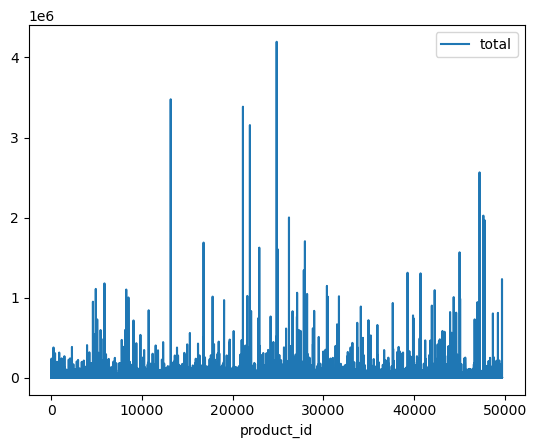

In [ ]:
# Le nombre total d'achats par produit (fréquence d'achat)
achats_par_produits = order_products_prior_df[["product_id","total"]].groupby("product_id").sum()
achats_par_produits.plot(y="total")

In [ ]:
# Les 10 produits les plus achetés
most_purchased =achats_par_produits.sort_values("total", ascending=False).head(10)

In [20]:
pd.merge(most_purchased,products_df[["product_name"]], on="product_id")

,total,product_name
product_id,,
24852,4195193,Banana
13176,3477205,Bag of Organic Bananas
21137,3384571,Organic Strawberries
21903,3155017,Organic Baby Spinach
47209,2564460,Organic Hass Avocado
47626,2024466,Large Lemon
26209,2001576,Limes
47766,1967617,Organic Avocado
27966,1704814,Organic Raspberries


<Axes: title={'center': "Densité d'achats en fonction de l'heure de la journée"}, xlabel='order_hour_of_day', ylabel='count'>

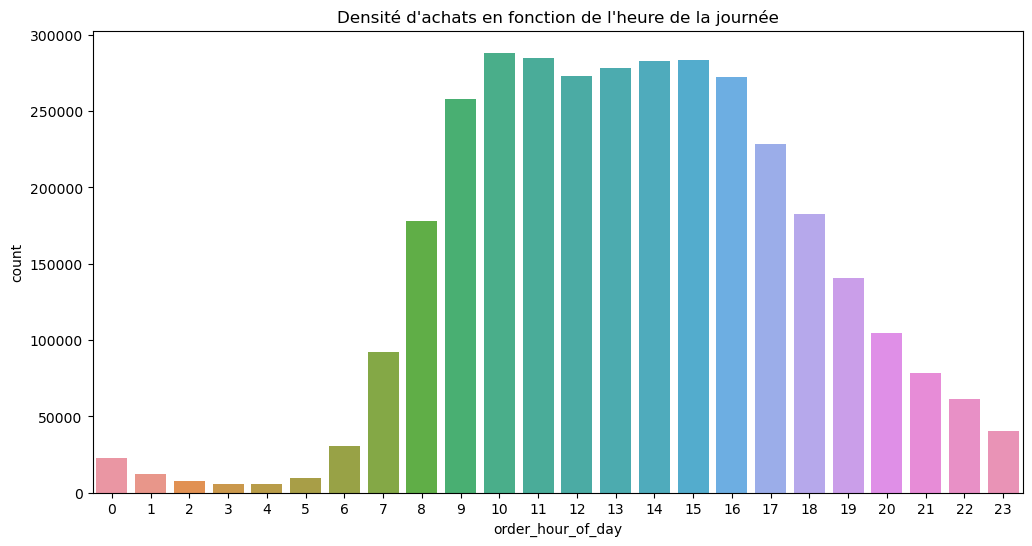

In [32]:
# Graphique de densité d'achats en fonction de l'heure de la journée
plt.figure(figsize=(12, 6))
plt.title("Densité d'achats en fonction de l'heure de la journée")
sns.countplot(x=orders_df.order_hour_of_day)

# Section 3: Segmentation des clients

In [22]:
# Nombre de commandes par user
user_orders = orders_df[orders_df['eval_set'] == 'prior'].groupby('user_id')['order_number'].max().reset_index(name='nb_commandes')

# Délai moyen entre commandes
user_days = orders_df[orders_df['eval_set'] == 'prior'].groupby('user_id')['days_since_prior_order'].mean().reset_index(name='delai_moyen')

pre_tape = order_products_prior_df.merge(orders_df, on='order_id')
# Nombre total de produits commandés
user_total_prods = pre_tape.groupby('user_id')['product_id'].count().reset_index(name='total_produits')

# Panier moyen
user_avg_basket = user_total_prods.merge(user_orders, on='user_id')
user_avg_basket['panier_moyen'] = user_avg_basket['total_produits'] / user_avg_basket['nb_commandes']

# % de produits reachetés
user_reorder_rate = pre_tape.groupby('user_id')['reordered'].mean().reset_index(name='taux_reachat')

# Fusion finale
user_features = user_orders.merge(user_days, on='user_id')\
                           .merge(user_avg_basket[['user_id', 'panier_moyen']], on='user_id')\
                           .merge(user_reorder_rate, on='user_id')


In [23]:
user_features

,user_id,nb_commandes,delai_moyen,panier_moyen,taux_reachat
0,1,10,19.555556,5.900000,0.694915
1,2,14,15.230769,13.928571,0.476923
2,3,12,12.090909,7.333333,0.625000
3,4,5,13.750000,3.600000,0.055556
4,5,4,13.333333,9.250000,0.378378
...,...,...,...,...,...
206204,206205,3,20.000000,10.666667,0.250000
206205,206206,67,3.772727,4.253731,0.473684
206206,206207,16,14.333333,13.937500,0.587444
206207,206208,49,7.437500,13.816327,0.707533


In [24]:
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_features.drop('user_id', axis=1))

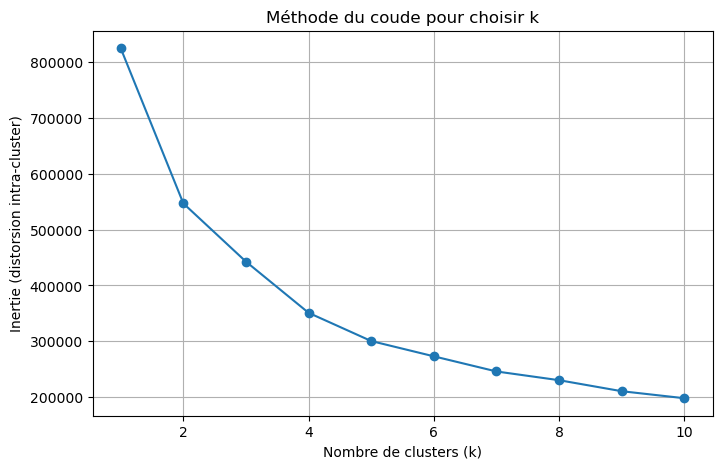

In [25]:

# Calculer l'inertie pour différents nombres de clusters
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Méthode du coude pour choisir k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (distorsion intra-cluster)")
plt.grid(True)
plt.show()


In [ ]:
# Appliquer KMeans avec k=4
kmeans = KMeans(n_clusters=4, random_state=0)
user_features['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
# descriptif des clusters
user_features.groupby('cluster').mean()

,user_id,nb_commandes,delai_moyen,panier_moyen,taux_reachat
cluster,,,,,
0,102965.323089,49.973708,6.987924,10.159560,0.714072
1,103134.922411,11.353064,15.876599,19.135934,0.470955
2,102991.485172,13.587369,11.793135,7.525294,0.468078
3,103281.228202,5.760488,22.323643,7.842955,0.251272


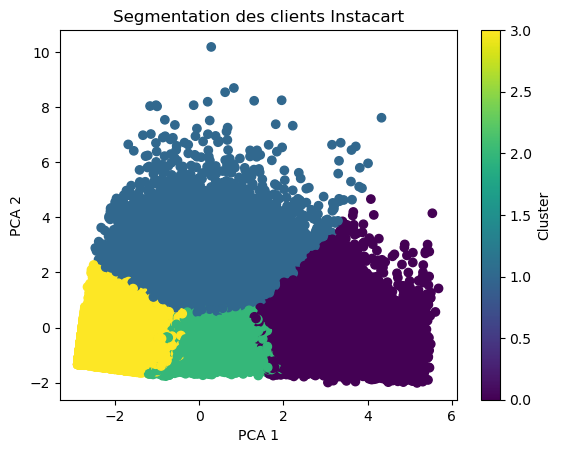

In [ ]:

# Visualiser les clusters avec PCA
# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=user_features['cluster'], cmap='viridis')
plt.title('Segmentation des clients Instacart')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()
